In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
len(df)

891

In [7]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [8]:
pd.crosstab(df['Embarked'], df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df['Sex'] = df.Sex.replace({'male': 0, 'female': 1})
pd.DataFrame(df)
df.head()

C:\Users\8b35r\AppData\Local\Temp\ipykernel_11716\1965267060.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df.Sex.replace({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Age'] = df.Age.fillna(df['Age'].median())
df['Age'].isna().sum()

np.int64(0)

In [12]:
tick=  df['Ticket'].str.split(' ', expand  = True)
tick[0].value_counts().sort_index(ascending=False)

0
WE/P      2
W/C       1
W.E.P.    1
W./C.     9
SW/PP     1
         ..
110813    1
110564    1
110465    2
110413    3
110152    3
Name: count, Length: 557, dtype: int64

In [13]:
df.dropna(subset=['Embarked'], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [14]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes

<Axes: >

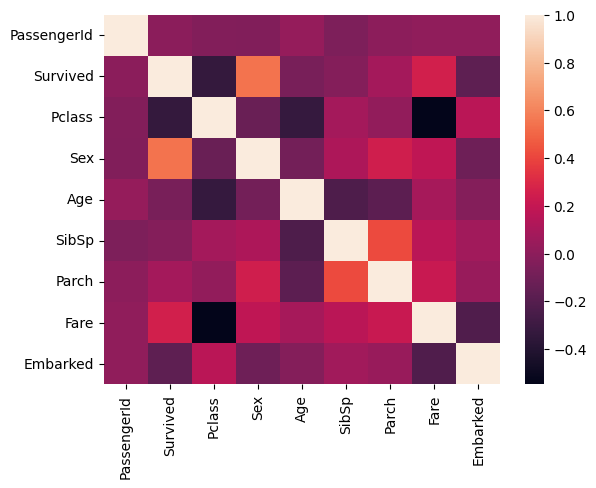

In [15]:
sns.heatmap(df.drop(['Name','Ticket','Cabin'], axis =1).corr())

In [16]:
df.drop(['Name','Ticket','Cabin'], axis =1).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030300,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958,-0.110320
Age,0.030300,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    int8   
dtypes: float64(2), int64(6), int8(1), object(3)
memory usage: 84.2+ KB


In [18]:
df = pd.get_dummies(df, columns=['Embarked','Pclass', 'Sex','SibSp'])

<Axes: >

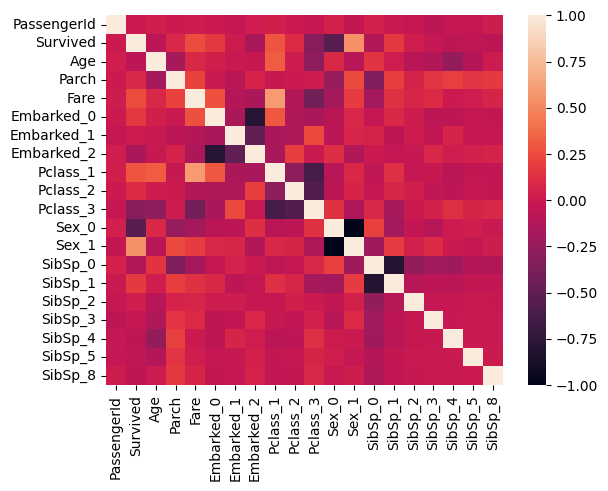

In [19]:
sns.heatmap(df.drop(['Name','Ticket','Cabin'], axis =1).corr())

In [20]:
df.drop(['Name','Ticket','Cabin','PassengerId'], axis =1).corr()

,Survived,Age,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
Survived,1.000000,-0.074673,0.083151,0.255290,0.169966,0.004536,-0.151777,0.282368,0.095002,-0.320171,-0.541585,0.541585,-0.118087,0.175030,0.030366,-0.036897,-0.063830,-0.059185,-0.070108
Age,-0.074673,1.000000,-0.178232,0.088604,0.033853,-0.012823,-0.021589,0.315984,0.008416,-0.278527,0.089434,-0.089434,0.146631,0.016583,-0.087307,-0.123160,-0.250642,-0.112879,0.000314
Parch,0.083151,-0.178232,1.000000,0.217532,-0.011588,-0.081585,0.061512,-0.015809,-0.001278,0.014634,-0.247508,0.247508,-0.355682,0.187742,0.058241,0.156156,0.199248,0.150874,0.178719
Fare,0.255290,0.088604,0.217532,1.000000,0.270731,-0.116684,-0.163758,0.590576,-0.117609,-0.411932,-0.179958,0.179958,-0.193970,0.134506,0.071368,0.100335,-0.000698,0.022414,0.067176
Embarked_0,0.169966,0.033853,-0.011588,0.270731,1.000000,-0.148646,-0.782613,0.299472,-0.126039,-0.154785,-0.084520,0.084520,-0.034046,0.091498,0.011658,-0.065349,-0.069393,-0.036303,-0.043003
Embarked_1,0.004536,-0.012823,-0.081585,-0.116684,-0.148646,1.000000,-0.499261,-0.154680,-0.127705,0.237035,-0.075217,0.075217,0.055905,-0.066981,0.013162,-0.041689,0.069309,-0.023159,-0.027434
Embarked_2,-0.151777,-0.021589,0.061512,-0.163758,-0.782613,-0.499261,1.000000,-0.165022,0.190824,-0.013594,0.121405,-0.121405,-0.005362,-0.038004,-0.018500,0.083501,0.017171,0.046387,0.054948
Pclass_1,0.282368,0.315984,-0.015809,0.590576,0.299472,-0.154680,-0.165022,1.000000,-0.287653,-0.625395,-0.093142,0.093142,-0.061432,0.128371,-0.026215,-0.016853,-0.080944,-0.042346,-0.050161
Pclass_2,0.095002,0.008416,-0.001278,-0.117609,-0.126039,-0.127705,0.190824,-0.287653,1.000000,-0.567432,-0.066459,0.066459,-0.032343,0.076883,0.035049,-0.048277,-0.073441,-0.038421,-0.045512
Pclass_3,-0.320171,-0.278527,0.014634,-0.411932,-0.154785,0.237035,-0.013594,-0.625395,-0.567432,1.000000,0.134227,-0.134227,0.079167,-0.173007,-0.006017,0.053823,0.129428,0.067711,0.080208


In [21]:
# Calculate the correlation matrix
correlation_matrix = df.drop(['Name','Ticket','Cabin'], axis =1).corr()

# Select upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find columns with a correlation above a threshold (e.g., 0.8)
highly_correlated_pairs = [
    (column, idx, correlation_matrix[column][idx]) 
    for idx in upper_triangle.columns 
    for column in upper_triangle.index 
    if abs(upper_triangle[column][idx]) > 0.8
]

# Display the highly correlated pairs
print("Highly correlated pairs:")
for col1, col2, corr in highly_correlated_pairs:
    print(f"{col1} and {col2} with correlation of {corr}")


Highly correlated pairs:
Sex_1 and Sex_0 with correlation of -0.9999999999999999
SibSp_1 and SibSp_0 with correlation of -0.8112632089402337


In [22]:
df.drop(['Name','Ticket','Cabin', 'Sex_0','PassengerId','SibSp_1'],axis = 1, inplace = True)

<Axes: >

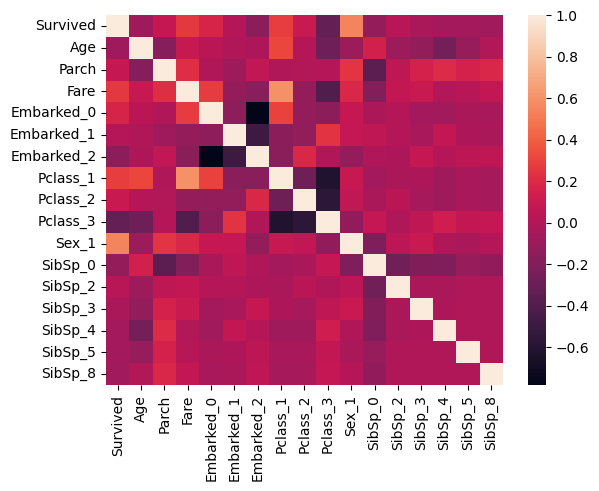

In [23]:
sns.heatmap(df.corr())

In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
highly_correlated_pairs = [
    (column, idx, correlation_matrix[column][idx]) 
    for idx in upper_triangle.columns 
    for column in upper_triangle.index 
    if abs(upper_triangle[column][idx]) > 0.8
]

# Display the highly correlated pairs
print("Highly correlated pairs:")
for col1, col2, corr in highly_correlated_pairs:
    print(f"{col1} and {col2} with correlation of {corr}")


Highly correlated pairs:


In [25]:
from sklearn.model_selection import train_test_split

# Assuming your target variable is in the 'target_column' column
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']                 # Target variable

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (711, 16) (711,)
Testing set size: (178, 16) (178,)


In [26]:
df.columns

Index(['Survived', 'Age', 'Parch', 'Fare', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'SibSp_0',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

## Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def apply_pca_from_scratch(X, n_components):
    # Center the data
    X_meaned = X - np.mean(X, axis=0)
    
    # Compute covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top n_components eigenvectors
    eigenvectors = eigenvectors[:, :n_components]
    
    # Transform the data
    X_reduced = np.dot(X_meaned, eigenvectors)
    
    return X_reduced, eigenvectors, eigenvalues

# Step 3: Visualize Principal Components with Bar Plot
def visualize_pca(eigenvalues):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7)
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue (Variance)')
    plt.grid()
    plt.show()


In [ ]:
class LogisticRegressionWithCost:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_param=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param
        self.costs = []

    def fit(self, X, y):
        y = np.array(y)  # Convert y to numpy array if it's a pandas Series
        y = y.reshape(-1, 1)  # Reshape to a column vector

        n_samples, n_features = X.shape
        self.theta = np.zeros((n_features, 1))

        for _ in range(self.n_iters):
            model = np.dot(X, self.theta)
            predictions = self.sigmoid(model)
            cost = self.compute_cost(X, y, predictions)
            self.costs.append(cost)
            gradient = np.dot(X.T, (predictions - y)) / n_samples
            self.theta -= self.lr * gradient

    def predict(self, X):
        model = np.dot(X, self.theta)
        predictions = self.sigmoid(model)
        return (predictions >= 0.5).astype(int)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y, predictions):
        m = len(y)
        cost = - (1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        regularization = (self.lambda_param / (2 * m)) * np.sum(np.square(self.theta[1:]))  # Regularization
        return cost + regularization

In [28]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

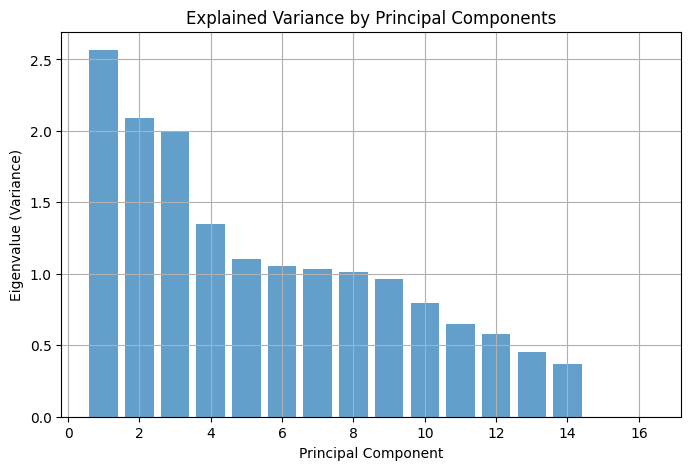

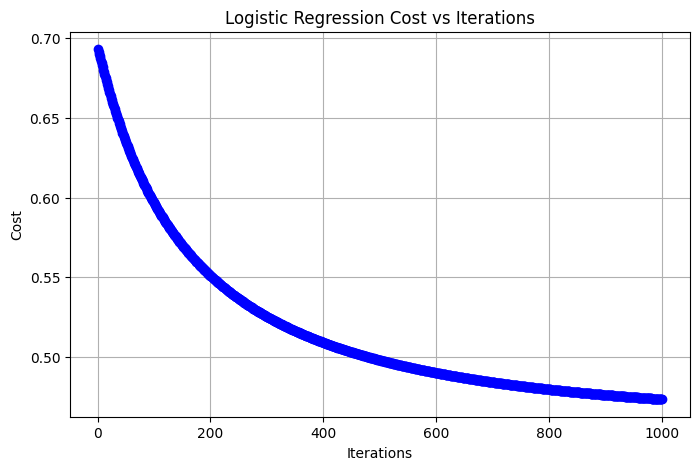

Logistic Regression Accuracy (No PCA): 0.8089887640449438
Logistic Regression Accuracy (With PCA): 0.7921348314606742
Classification Report for Logistic Regression (No PCA):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.75      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Classification Report for Logistic Regression (With PCA):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [27]:
if __name__ == "__main__":

    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Apply PCA (From Scratch)
    X_train_pca, eigenvectors, eigenvalues = apply_pca_from_scratch(X_train, n_components=10)
    X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), eigenvectors)

    # Visualize PCA with Bar Plot
    visualize_pca(eigenvalues)

    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_pred_svm = [0 if x == -1 else x for x in y_pred_svm]
    # Train Logistic Regression with Cost Tracking
    lr_with_cost = LogisticRegressionWithCost(learning_rate=0.01, n_iters=1000, lambda_param=0.01)
    lr_with_cost.fit(X_train, y_train)
    
    # Plot Cost vs Iterations for Logistic Regression
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, lr_with_cost.n_iters + 1), lr_with_cost.costs, color='blue', marker='o', linestyle='--')
    plt.title('Logistic Regression Cost vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    # Train Logistic Regression (No PCA)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    # Train Logistic Regression with PCA
    lr_pca = LogisticRegression()
    lr_pca.fit(X_train_pca, y_train)
    y_pred_lr_pca = lr_pca.predict(X_test_pca)

    # Evaluate models
    print("Logistic Regression Accuracy (No PCA):", accuracy_score(y_test, y_pred_lr))
    print("Logistic Regression Accuracy (With PCA):", accuracy_score(y_test, y_pred_lr_pca))

    print("Classification Report for Logistic Regression (No PCA):")
    print(classification_report(y_test, y_pred_lr))

    print("Classification Report for Logistic Regression (With PCA):")
    print(classification_report(y_test, y_pred_lr_pca))


SVM Accuracy (No PCA): 0.7921348314606742


In [34]:
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.73      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

